In [15]:
import joblib
import numpy as np
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

In [6]:
models = ["alexnet"]

layers = [  [
            'features.0',       # conv1
            'features.4',       # conv2
            'features.7',       # conv3
            'features.9',       # conv4
            'features.11',      # conv5
            'classifier.2',     # fc6
            'classifier.5'      # fc7
        ],
            [
            'features.0',       # conv1_1 (V1)
            'features.2',       # conv1_2
            'features.5',       # conv2_2
            'features.10',      # conv3_3
            'features.12',      # conv4_1
            'features.16',      # conv4_3
            'features.19',      # conv5_1
            'features.23',      # conv5_3
            'features.30',      # final conv
            'classifier.0'      # first FC layer
        ],
        [
            'conv_proj',                                      # patch embedding (V1-like)
            'encoder.layers.encoder_layer_0.add_1',           # early transformer block ?~F~P V1
            'encoder.layers.encoder_layer_2.add_1',           # mid/early block
            'encoder.layers.encoder_layer_4.add_1',           # mid
            'encoder.layers.encoder_layer_6.add_1',           # V4-like
            'encoder.layers.encoder_layer_8.add_1',           # higher block
            'encoder.layers.encoder_layer_10.add_1',          # deep
            'encoder.layers.encoder_layer_11.add_1',          # very deep ?~F~P IT
            'encoder.ln',                                     # final transformer output
            'heads.head'                                      # classification head ?~F~P IT
        ], 
        [
            'conv1',                         # V1
            'layer1.0.relu_1',               # V2
            'layer1.1.relu_1',               # V2/V4
            'layer2.0.relu_1',               # V4
            'layer2.1.relu_1',               # V4
            'layer3.0.relu_1',               # V4/IT
            'layer3.1.relu_1',               # IT
            'layer4.0.relu_1',               # IT
            'layer4.1.relu_1',               # IT
            'avgpool'                        # pooled features (IT-like)
        ],
        [
            'conv1',                         # V1
            'layer1.0.relu_2',
            'layer1.1.relu_2',               # V2
            'layer1.2.relu_2',               # V2
            'layer2.0.relu_2',
            'layer2.1.relu_2',               # V4
            'layer2.2.relu_2',               # V4
            'layer2.3.relu_2',               # V4
            'layer3.0.relu_2',
            'layer3.1.relu_2',               # V4/IT
            'layer3.2.relu_2',               # V4/IT
            'layer3.3.relu_2',               # IT-like
            'layer3.4.relu_2',
            'layer3.5.relu_2',               # IT-like
            'layer4.0.relu_2',
            'layer4.1.relu_2',               # IT-like
            'layer4.2.relu_2',
            'avgpool'
        ]]


In [8]:
imod = 0
ilayer = 0
path2file = f"/Users/tizianocausin/Library/CloudStorage/OneDrive-SISSA/data_repo/exp_set_res/silico/imagenet_val_{models[imod]}_{layers[imod][ilayer]}_pca_model.pkl"
data_l0 = joblib.load(path2file)

In [11]:
print(type(data_l0))
print(data_l0.components_.shape)     # Principal axes (eigenvectors)
print(data_l0.explained_variance_.shape)   # Variance explained by each component
print(np.sum(data_l0.explained_variance_ratio_))  # Ratio of explained variance
print(data_l0.n_components)          # Number of components  

<class 'sklearn.decomposition._incremental_pca.IncrementalPCA'>
(500, 193600)
(500,)
0.4199717501897162
500


In [14]:
cdf = np.cumsum(data_l0.explained_variance_ratio_)

Text(0.5, 1.0, 'alexnet features.0')

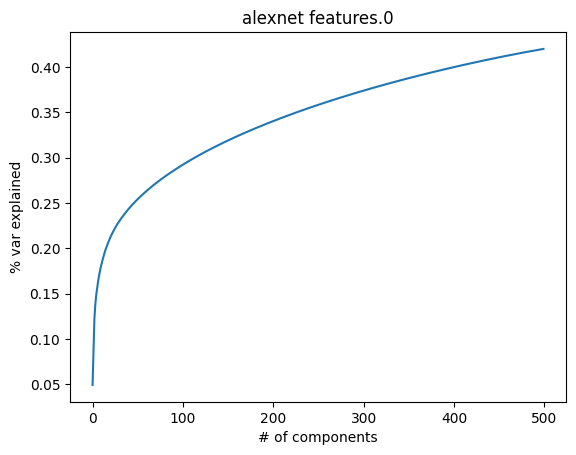

In [20]:
plt.plot(cdf)
plt.xlabel("# components")
plt.ylabel("% var explained")
plt.title(f"{models[imod]} {layers[imod][ilayer]}")